In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import scipy.stats as scs

%matplotlib inline
plt.style.use('fivethirtyeight')

import calendar

In [72]:
stations.head()

,Unnamed: 0,short_name,capacity,lon,lat,name,region_id
station_id,,,,,,,
3,0,SF-G27,35,-122.404904,37.786375,Powell St BART Station (Market St at 4th St),3.0
4,1,SF-G26,35,-122.408915,37.785881,Cyril Magnin St at Ellis St,3.0
5,2,SF-H26,35,-122.408445,37.783899,Powell St BART Station (Market St at 5th St),3.0
6,3,SF-A27,23,-122.403234,37.804770,The Embarcadero at Sansome St,3.0
8,5,SF-C28-1,23,-122.398525,37.799953,The Embarcadero at Vallejo St,3.0


In [ ]:
df = pd.read_csv('data/lyft/trips4.csv', index_col = 0, parse_dates = ['start_time', 'end_time'])

In [7]:
df['day'] = df['start_time'].apply(lambda x: x.weekday())
df['day'] = df['day'].apply(lambda x: calendar.day_name[x])

df['month'] = df['start_time'].apply(lambda x: x.month)
df['month'] = df['month'].apply(lambda x: calendar.month_name[x])

df['velocity'] = (df['bicycle_distance']/1609.34) / (df['duration_sec']/3600)


In [11]:
short = df.loc[df['bicycle_duration'] < df['transit_duration']]
long = df.loc[df['bicycle_duration'] > df['transit_duration']]

short2 = short[['station1','station2','duration_sec','bicycle_distance']].groupby(["station1","station2"]).mean()
long2 = long[['station1','station2','duration_sec','bicycle_distance']].groupby(["station1","station2"]).mean()

In [95]:

stations = pd.read_csv('data/lyft/sf_stations.csv').drop(columns=['Unnamed: 0','region_id'])


In [123]:
# Build stations data frame

#If i go farther from down town do i get used less likely

#stations['departures'] = df[''].apply(lambda xdf['station1']
stations['departures'] = stations['station_id'].apply(lambda x: len(df.loc[df['start_station_id'] == x]))
stations['arrivals'] = stations['station_id'].apply(lambda x: len(df.loc[df['end_station_id'] == x]))
stations['total_use'] = stations['departures']+stations['arrivals']

                                 
##avg trip lenght,avg trip distance, distance from most used area

In [247]:
def calc_trips_between(station1, station2):
    
    value1 = sum(df.loc[df['start_station_id'] == station1]['end_station_id'] == station2)
    value2 =sum(df.loc[df['start_station_id'] == station2]['end_station_id'] == station1)
    return value1 + value2
    

  


In [193]:
stations

,short_name,capacity,station_id,lon,lat,name,deparures,departures,arrivals,total_use,...,31,33,34,36,37,38,39,41,42,43
0,SF-G27,35,3,-122.404904,37.786375,Powell St BART Station (Market St at 4th St),72835,72835,78273,151108,...,108,232,252,1228,2694,27,148,264,174,168
1,SF-G26,35,4,-122.408915,37.785881,Cyril Magnin St at Ellis St,14905,14905,15012,29917,...,108,232,252,1228,2694,27,148,264,174,168
2,SF-H26,35,5,-122.408445,37.783899,Powell St BART Station (Market St at 5th St),60023,60023,63446,123469,...,108,232,252,1228,2694,27,148,264,174,168
3,SF-A27,23,6,-122.403234,37.804770,The Embarcadero at Sansome St,77842,77842,90384,168226,...,108,232,252,1228,2694,27,148,264,174,168
4,SF-C28-1,23,8,-122.398525,37.799953,The Embarcadero at Vallejo St,25935,25935,27024,52959,...,108,232,252,1228,2694,27,148,264,174,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,SF-Z16,0,502,-122.443810,37.722382,Delano Ave at Oneida Ave,0,0,0,0,...,108,232,252,1228,2694,27,148,264,174,168
223,SF-BB17,0,503,-122.440106,37.716161,London St at Geneva Ave,0,0,0,0,...,108,232,252,1228,2694,27,148,264,174,168
224,SF-AA17,0,504,-122.438303,37.721544,Onondaga Ave at Alemany Blvd,0,0,0,0,...,108,232,252,1228,2694,27,148,264,174,168
225,SF-CC18,0,505,-122.433491,37.713193,Geneva Ave at Moscow St,0,0,0,0,...,108,232,252,1228,2694,27,148,264,174,168


In [136]:
df.head()

,bicycle_distance,bicycle_duration,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,station1,station2,transit_distance,transit_duration
0,0,0,9226,30,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2018-01-01 01:24:47.166,30,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-31 22:51:00.918,30.0,30.0,2045.0,1025.0
1,0,0,547,30,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-31 23:01:43.178,30,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-31 22:52:35.849,30.0,30.0,2045.0,1025.0
2,0,0,444,30,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-28 09:11:23.680,30,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-28 09:03:58.690,30.0,30.0,2045.0,1025.0
3,0,0,2701,30,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-24 21:23:53.087,30,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-24 20:38:51.703,30.0,30.0,2045.0,1025.0
4,0,0,2570,30,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-24 21:23:35.997,30,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-24 20:40:45.861,30.0,30.0,2045.0,1025.0


In [128]:
stations.sort_values(by='total_use', ascending = False).head()
    

,short_name,capacity,station_id,lon,lat,name,deparures,departures,arrivals,total_use
11,SF-E29-1,38,15,-122.394203,37.795392,San Francisco Ferry Building (Harry Bridges Pl...,91542,91542,105132,196674
25,SF-J29,19,30,-122.395282,37.776598,San Francisco Caltrain (Townsend St at 4th St),84509,84509,105751,190260
46,SF-J23-1,31,58,-122.417385,37.776619,Market St at 10th St,83648,83648,84615,168263
3,SF-A27,23,6,-122.403234,37.804770,The Embarcadero at Sansome St,77842,77842,90384,168226
65,SF-K29-1,35,81,-122.393170,37.775880,Berry St at 4th St,84837,84837,83205,168042


In [129]:
stations.sort_values(by='departures', ascending = False).head()

,short_name,capacity,station_id,lon,lat,name,deparures,departures,arrivals,total_use
11,SF-E29-1,38,15,-122.394203,37.795392,San Francisco Ferry Building (Harry Bridges Pl...,91542,91542,105132,196674
65,SF-K29-1,35,81,-122.393170,37.775880,Berry St at 4th St,84837,84837,83205,168042
25,SF-J29,19,30,-122.395282,37.776598,San Francisco Caltrain (Townsend St at 4th St),84509,84509,105751,190260
46,SF-J23-1,31,58,-122.417385,37.776619,Market St at 10th St,83648,83648,84615,168263
3,SF-A27,23,6,-122.403234,37.804770,The Embarcadero at Sansome St,77842,77842,90384,168226


In [130]:
stations.sort_values(by='arrivals', ascending = False).head()

,short_name,capacity,station_id,lon,lat,name,deparures,departures,arrivals,total_use
25,SF-J29,19,30,-122.395282,37.776598,San Francisco Caltrain (Townsend St at 4th St),84509,84509,105751,190260
11,SF-E29-1,38,15,-122.394203,37.795392,San Francisco Ferry Building (Harry Bridges Pl...,91542,91542,105132,196674
3,SF-A27,23,6,-122.403234,37.804770,The Embarcadero at Sansome St,77842,77842,90384,168226
16,SF-F28-2,39,21,-122.400811,37.789625,Montgomery St BART Station (Market St at 2nd St),73184,73184,89471,162655
46,SF-J23-1,31,58,-122.417385,37.776619,Market St at 10th St,83648,83648,84615,168263


In [62]:
mean_real_duration = np.mean(df['duration_sec']) 
mean_google_bicycle_duration = np.mean(df['bicycle_duration'])
mean_google_transit_duration = np.mean(df['transit_duration'])

sd_real_duration = np.std(df['duration_sec']) 
sd_google_bicycle_duration = np.std(df['bicycle_duration'])
sd_google_transit_duration = np.std(df['transit_duration'])


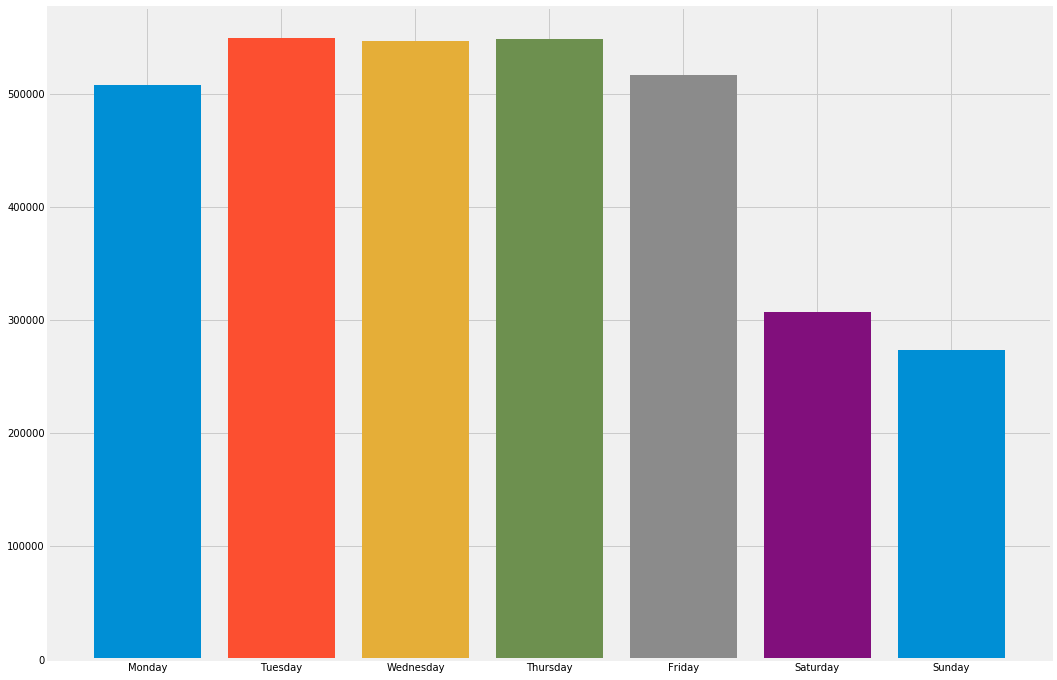

In [19]:
fig, ax = plt.subplots(1, figsize = (16,12), facecolor = 'white')

days= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
week = ['Monday','Tuesday','Wednesday','Thursday','Friday']
weekend = ['Saturday', 'Sunday']

for d in days:
    len(df.loc[df['day'] == 'd'])
    ax.bar(d,len(df.loc[df['day'] == d]))



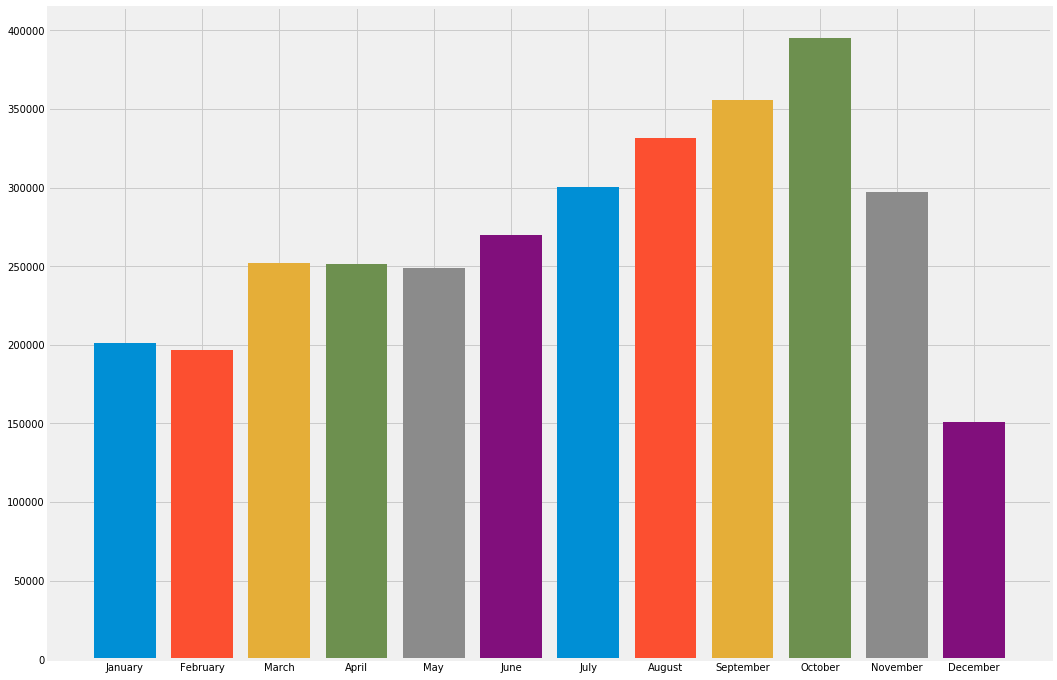

In [26]:
fig, ax = plt.subplots(1, figsize = (16,12), facecolor = 'white')

months= ['January','February','March','April','May','June',"July","August","September","October","November","December"]


for m in months:
    len(df.loc[df['month'] == 'm'])
    ax.bar(m,len(df.loc[df['month'] == m]))

In [61]:
def plot_mean(data, ax,)

In [ ]:
def plot_with_fill(ax, x, y, label):
    lines = ax.plot(x, y, label=label, lw=2)
    ax.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_c())
    


In [ ]:
fig, ax = plt.subplots()
prior = plot_with_fill(ax, x ,y, 'siteA')
posterior = plot_with_fill(ax, x, y1, 'First 50')

In [ ]:
def print_sorted(ax, data, label):
    '''
    takes a np.array and prints a sorted bar graph
    '''
    data_sorted = data.sorted
    ax.bar(data_sorted)
    
    

In [ ]:
fig, axs = plt.subplots(2, figsize=(16, 8))
bar_sizes = [binomial.pmf(i) for i in range(3101)]
bars = axs[0].bar(range(3101), bar_sizes, color="black", align="center")
axs[0].plot(x, normal_approx.pdf(x), linewidth=3)
axs[0].set_xlim(0, 2600)

bars = axs[1].bar(range(3101), bar_sizes, color="grey", align="center")
axs[1].plot(x, normal_approx.pdf(x), linewidth=3)
axs[1].set_xlim(2400, 2600)



binomial = scs.binom(n=3100, p=0.80)
binomial_mean = 0.8 * 3100
binomial_var = 3100 * 0.8 * 0.2
normal_approx = stats.norm(binomial_mean, np.sqrt(binomial_var))
x = np.linspace(0, 3100, num=3000)



In [253]:
stations.loc[stations['station_id'] == 3]['lon']



0   -122.404904
Name: lon, dtype: float64

In [280]:
def plot_connection(ax, station1, station2):
    station1_lat = float(stations.loc[stations['station_id'] == station1]['lat'])
    station1_lon = float(stations.loc[stations['station_id'] == station1]['lon'])
    station2_lat = float(stations.loc[stations['station_id'] == station2]['lat'])
    station2_lon = float(stations.loc[stations['station_id'] == station2]['lon'])
    
    
    plt.plot([station1_lon,station2_lon],[station1_lat,station2_lat], alpha = 0.2)
    
    

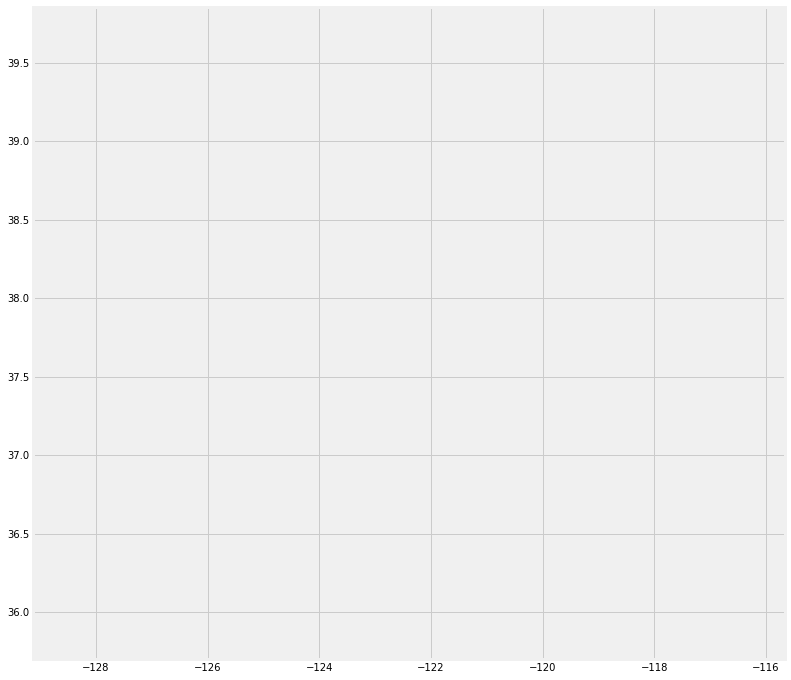

In [303]:
fig, ax = plt.subplots(figsize=(12,12))

for i in df[:4].iterrows():
    
    plot_connection(ax, i[1]['start_station_id'], i[1]['end_station_id'])


In [304]:
df.head()

,bicycle_distance,bicycle_duration,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,station1,station2,transit_distance,transit_duration
0,0,0,9226,30,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2018-01-01 01:24:47.166,30,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-31 22:51:00.918,30.0,30.0,2045.0,1025.0
1,0,0,547,30,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-31 23:01:43.178,30,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-31 22:52:35.849,30.0,30.0,2045.0,1025.0
2,0,0,444,30,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-28 09:11:23.680,30,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-28 09:03:58.690,30.0,30.0,2045.0,1025.0
3,0,0,2701,30,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-24 21:23:53.087,30,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-24 20:38:51.703,30.0,30.0,2045.0,1025.0
4,0,0,2570,30,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-24 21:23:35.997,30,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-24 20:40:45.861,30.0,30.0,2045.0,1025.0
